In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_excel(r'Household Socio Economic Data.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11634 entries, 0 to 11633
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   HouseholdId                11634 non-null  int64         
 1   ObseravtionDate            11634 non-null  datetime64[ns]
 2   WaterSource                11634 non-null  int64         
 3   Toilet                     11634 non-null  int64         
 4   ConnectedToGrid            11228 non-null  float64       
 5   CookingFuel                11634 non-null  int64         
 6   WallMaterial               11634 non-null  int64         
 7   FloorMaterial              11634 non-null  int64         
 8   Bedrooms                   11384 non-null  float64       
 9   Crime                      11634 non-null  int64         
 10  FinancialStatus            11634 non-null  int64         
 11  CutMeals                   11437 non-null  float64       
 12  CutM

In [4]:
data.shape

(11634, 17)

In [5]:
data.head()

,HouseholdId,ObseravtionDate,WaterSource,Toilet,ConnectedToGrid,CookingFuel,WallMaterial,FloorMaterial,Bedrooms,Crime,FinancialStatus,CutMeals,CutMealsFrequency,NotEat,NotEatFrequency,ChildMealSkipCut,ChildMealSkipCutFrequency
0,111000,2017-10-26,2,2,1.0,4,3,2,2.0,0,0,0.0,0,NaN,0,NaN,0
1,111001,2017-10-24,2,2,1.0,4,1,2,4.0,0,0,0.0,0,NaN,0,NaN,0
2,111002,2017-10-26,2,2,1.0,4,1,2,3.0,0,0,0.0,0,NaN,0,NaN,0
3,111003,2017-10-26,2,2,1.0,4,1,2,5.0,0,0,0.0,0,NaN,0,NaN,0
4,111004,2017-10-26,2,2,1.0,4,1,2,6.0,0,0,0.0,0,NaN,0,NaN,0


In [6]:
data.tail()

,HouseholdId,ObseravtionDate,WaterSource,Toilet,ConnectedToGrid,CookingFuel,WallMaterial,FloorMaterial,Bedrooms,Crime,FinancialStatus,CutMeals,CutMealsFrequency,NotEat,NotEatFrequency,ChildMealSkipCut,ChildMealSkipCutFrequency
11629,122629,2015-12-16,2,2,1.0,4,1,2,3.0,0,0,0.0,0,NaN,0,NaN,0
11630,122630,2016-05-05,2,2,1.0,4,1,2,6.0,0,0,0.0,0,NaN,0,NaN,0
11631,122631,2015-12-09,2,1,1.0,4,1,2,2.0,0,0,0.0,0,NaN,0,NaN,0
11632,122632,2014-12-16,2,2,1.0,4,1,2,5.0,0,0,0.0,0,NaN,0,NaN,0
11633,122633,2016-01-20,2,2,1.0,4,1,2,3.0,0,0,0.0,0,NaN,0,NaN,0


In [7]:
missing_percent = (data.isnull().sum()/data.isnull().count()*100)
count=data.isnull().sum()
df = pd.DataFrame({'missing_percent':missing_percent,'count':count,'dtypes':data.dtypes})
df

,missing_percent,count,dtypes
HouseholdId,0.000000,0,int64
ObseravtionDate,0.000000,0,datetime64[ns]
WaterSource,0.000000,0,int64
Toilet,0.000000,0,int64
ConnectedToGrid,3.489771,406,float64
CookingFuel,0.000000,0,int64
WallMaterial,0.000000,0,int64
FloorMaterial,0.000000,0,int64
Bedrooms,2.148874,250,float64
Crime,0.000000,0,int64


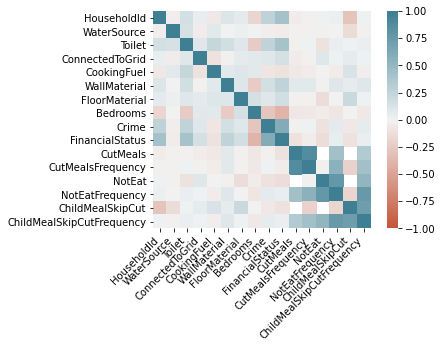

In [8]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Looking at the histogram above we can quickly observe that a relationship between the fininacial status and Crime at 75% correlation.

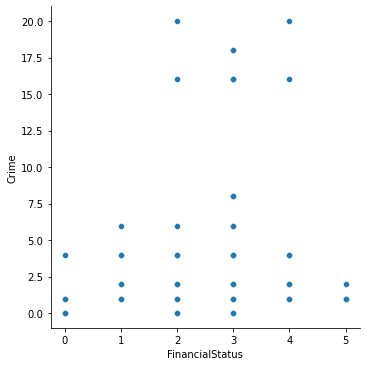

In [23]:
sns.relplot(x="FinancialStatus", y="Crime", data=data, kind="scatter");

It looks like alot crime occurs within the middle class group 

C:\Users\venetia.mokgawa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Percentage of financial status in each household')

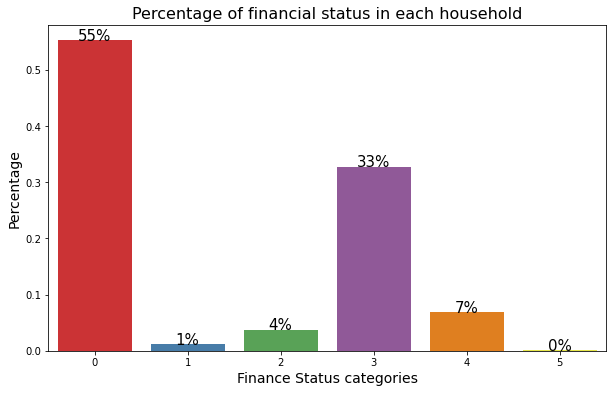

In [9]:
#Ploting barplot for target 
plt.figure(figsize=(10,6))
g = sns.barplot(data['FinancialStatus'], data['FinancialStatus'], palette='Set1', estimator=lambda x: len(x) / len(data) )

#Anotating the graph
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
               y+height, 
               '{:.0%}'.format(height), 
               horizontalalignment='center',fontsize=15)

#Setting the labels
plt.xlabel('Finance Status categories', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of financial status in each household', fontsize=16)

In [10]:
data['CookingFuel'].value_counts()

4    9525
1    1082
5     534
0     396
2      77
3      20
Name: CookingFuel, dtype: int64

0 - Missing/Refused

1 - Wood

2 - Gas (LPG)

3 - Coal

4 - Electricity

5 - Paraffin

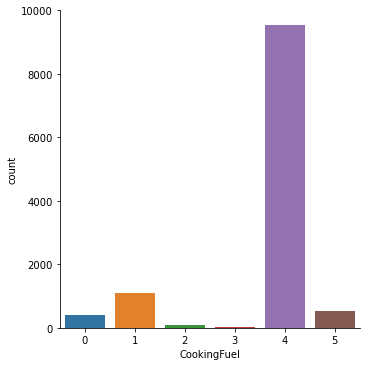

In [12]:
sns.catplot(data=data,x='CookingFuel',kind='count')

In [13]:
data['ConnectedToGrid'].value_counts()

1.0    10551
0.0      677
Name: ConnectedToGrid, dtype: int64

1-Yes

2-No

In [15]:
data['ConnectedToGrid'].fillna(data['ConnectedToGrid'].mode()[0], inplace=True)
data['ConnectedToGrid'] = data['ConnectedToGrid'].astype('Int64')

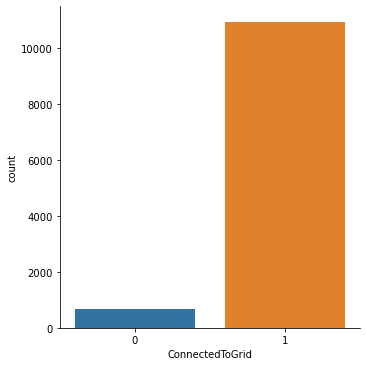

In [16]:
sns.catplot(data=data,x='ConnectedToGrid',kind='count')

In [17]:
data['WaterSource'].value_counts()

1     5619
2     4867
0      333
8      233
10     187
3      171
6      152
4       42
7       21
11       9
Name: WaterSource, dtype: int64

Text(0, 0.5, 'Count of the Water Source Households')

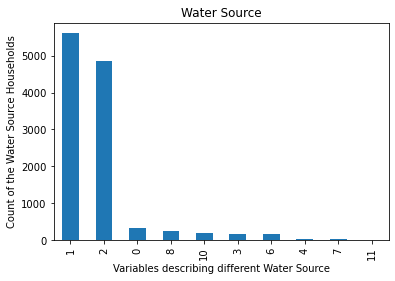

In [19]:
data['WaterSource'].value_counts().plot(kind='bar')
plt.title("Water Source")
plt.xlabel('Variables describing different Water Source')
plt.ylabel('Count of the Water Source Households')

The values below shows us the description of the different variables of the Water Source. Here it is observable that the house/stand that are available in the dataset are mostly piped. 

- 0 - Missing/Refused
- 1 - Piped – to stand/house
- 2 - Piped – Public tap/kiosk
- 3 - Borehole/well
- 4 - Rainwater
- 5 - Flowing river/stream
- 6 - Dam/standing water
- 7 - Protected spring
- 8 - Water carrier or tanker
- 10 - Other purified watersource
- 11 - Other unpurified watersource

**Water Source Analysis**

There are water sources connected to households and in many of these can be observed on the bar plot above and the description below it. Surface water includes rivers and lakes, and is often used for large urban water supply. Whereas, Many rural communities are solely dependent on groundwater for their water supply. The bar plot ('Water Source') depicts water to is mostly distributed to households via pipes which can be consired as connected to rivers, dams and lakes. It is worth noting that in these households they receive small amounts of water directly from Rainwater (0.
4 %), Protected spring (0.2 %), and Other unpurified watersource (0.1 %). It is understandable that these sources provide the least amount of water directly as South Africa's rainfall is approximately 490 mm per year and is considered as half of the world's average.

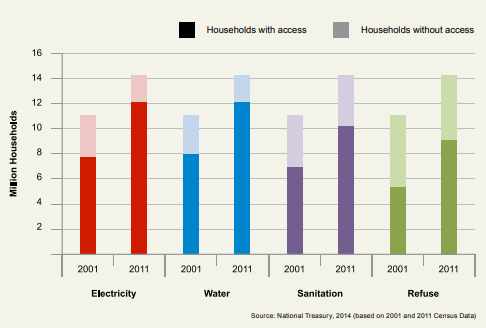

In [22]:
from IPython.display import Image
Image("picture.png")

Between 2001 and 2011, the percentage of households with piped water has increased to 46.3 %. This census includes households in both urban and rural. Since most of the water is distributed to the citizens of South Africa through pipes, there are issues that arises and needs to dealt with. That is, "Preventing, monitoring and repairing water leaks in deep rural areas poses a significant challenge. Leakages are caused by anything from burst or blocked pipes to taps that are left running. As a water-scarce country, we urgently need to bring down the 37% of water losses that occur in most South African municipalities."


Currently, South Africa is using water within their natural supply’s limits (they are using 98 percent of their predicted total resources). Unfortunately, they are not using it efficiently. In addition to the stolen or lost water, South Africa is also losing over 1.5 billion cubic meters of water a year due to faulty piping infrastructure that has outlived its lifespan [7]. Ideally, broken pipes would be replaced and updated as necessary. However, funds may not be available for this all at once.


South Africa will face serious water problems if steps are not taken to increase the country’s efficiency of water use or or ability to distribute water to its people. Mission 2017 believes that the solutions outlined above, including the use of water meters and truck delivery routes, will greatly reduce the amount of water being wasted or lost.

# Investigating Toilets

Line of thought:
    The government usually develop polices to provide toilets to underdeveloped areas for the purposes of 
    ensuring heigen and sanitation for all. It is important to know which toilet systems will most likely
    be appreciated by each community before rolling out such. so the following are of interest to us:-
    
    What's the distribution of each toilet category? 
    How does watersource compare the toilet being used? 
    Background investigation on the most used toilet category used? 

(array([ 374.,    0.,  357.,    0., 7851.,    0., 2950.,    0.,   86.,
          16.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

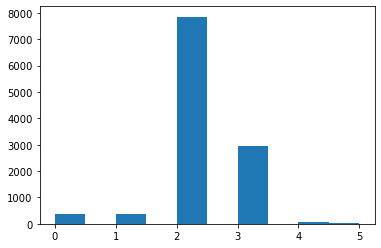

In [4]:
plt.hist(data['Toilet'])

Observation:
Variable(s): Toilet
---
* 0 - Missing/Refused
* 1 - Flush
* 2 - Ventilated Improved Pit
* 3 - Other Pit Latrine
* 4 - Bucket
* 5 - Chemical

---

* Pit toilets dominates all other categories, with just about 500 toilets using flushing system. 
* This suggests the data to be from an area that is still underdeveloped, as it can be seen that even the bucket and 